generation: 0 | best fitness: 4384302.6792 | curr fitness: 4384302.6792 | curr parent: 20.5836


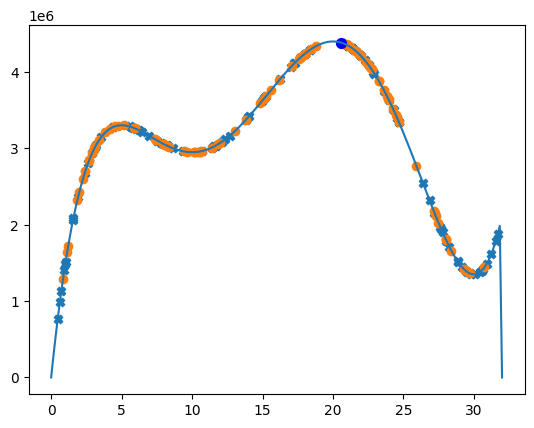

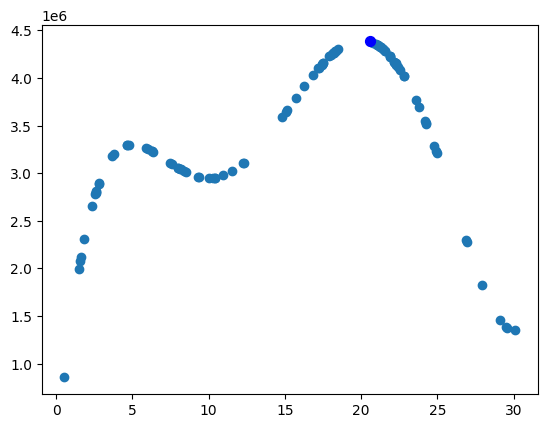

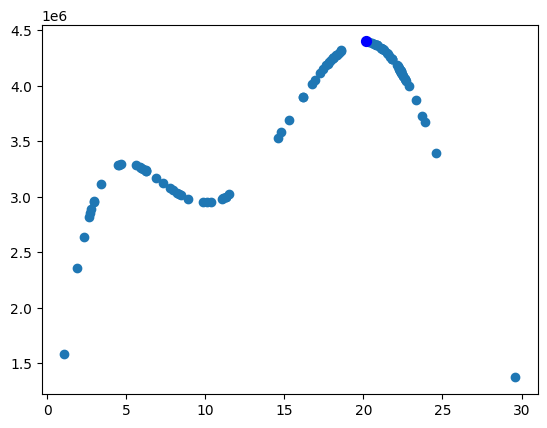

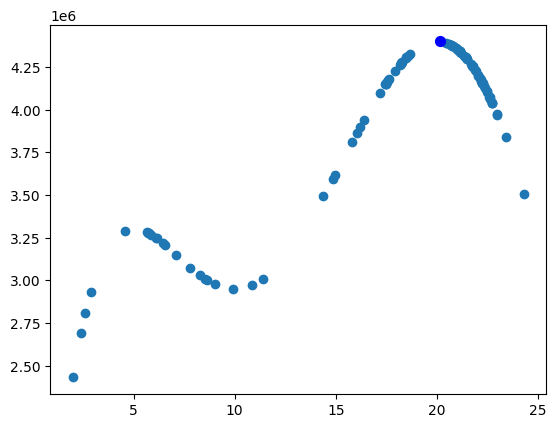

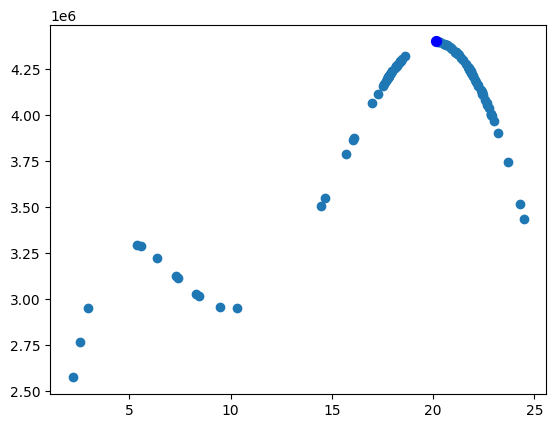

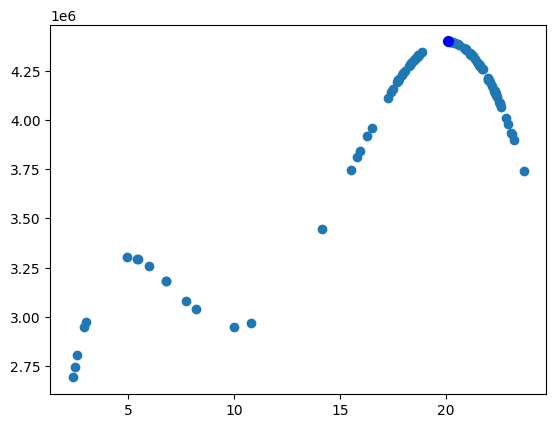

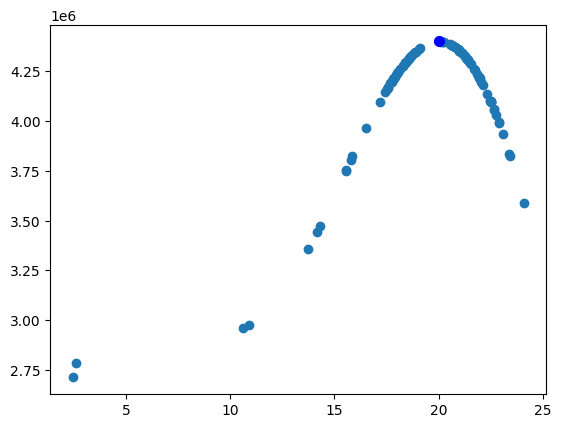

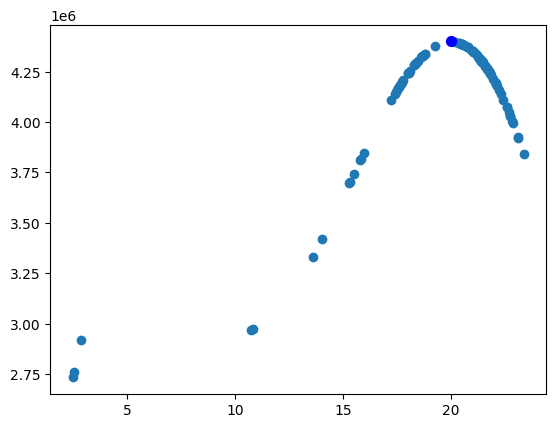

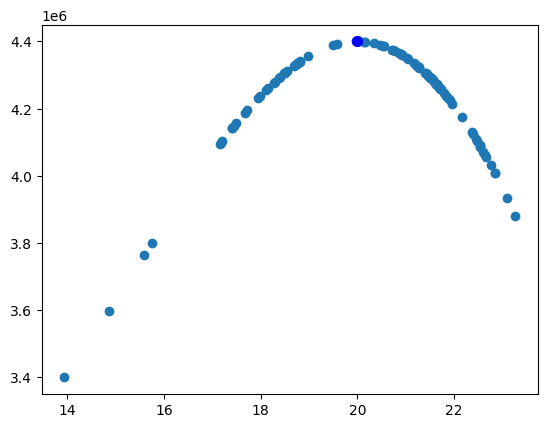

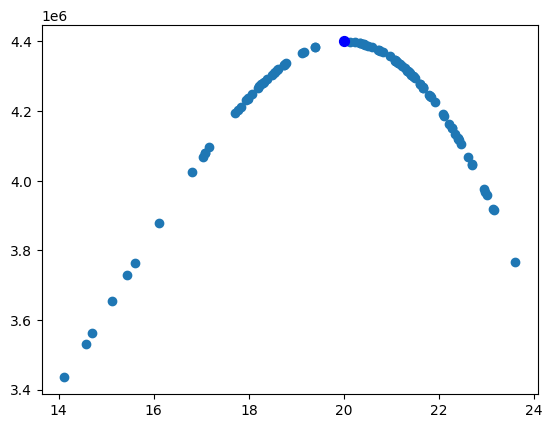

generation: 10 | best fitness: 4399999.9347 | curr fitness: 4399966.3741 | curr parent: 19.9726


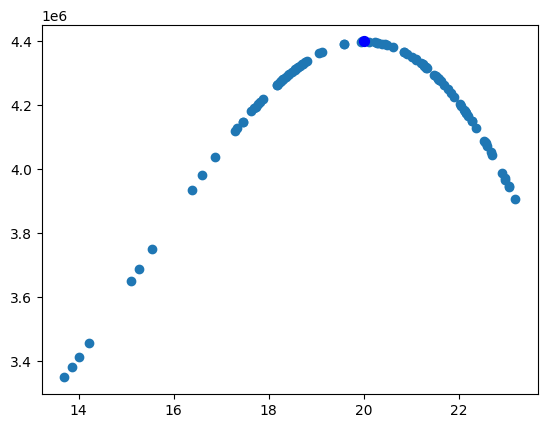

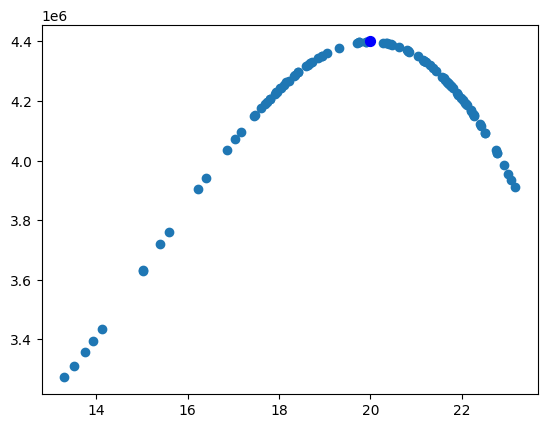

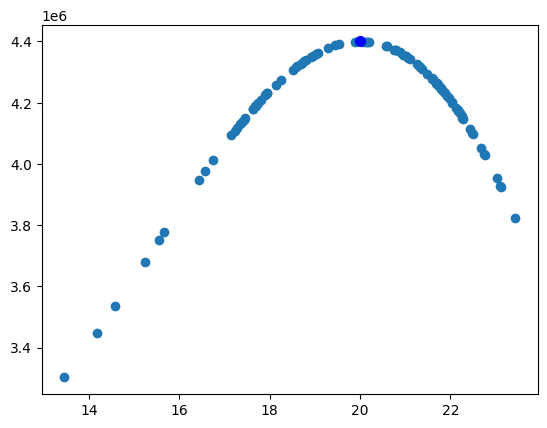

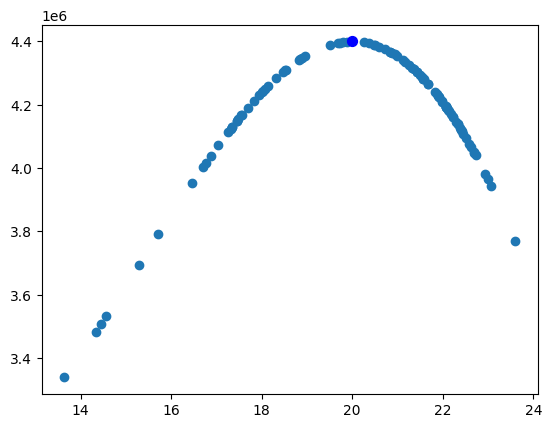

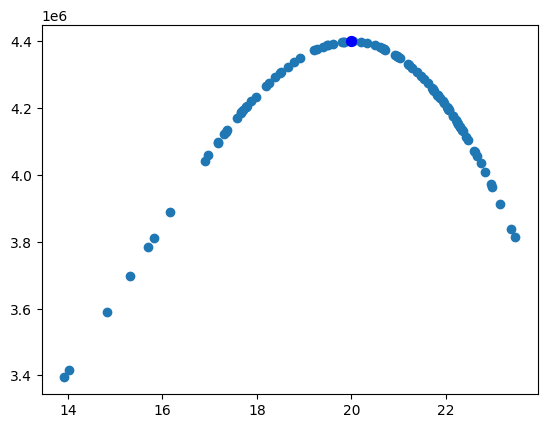

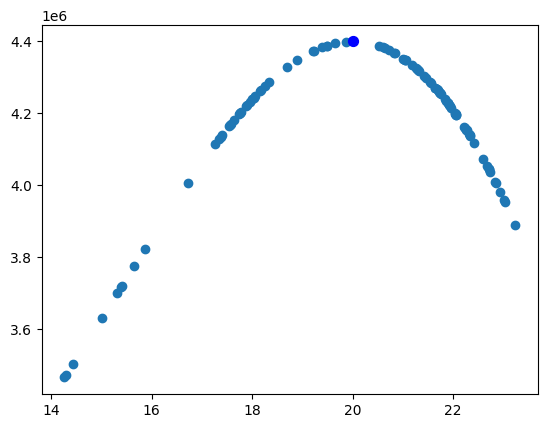

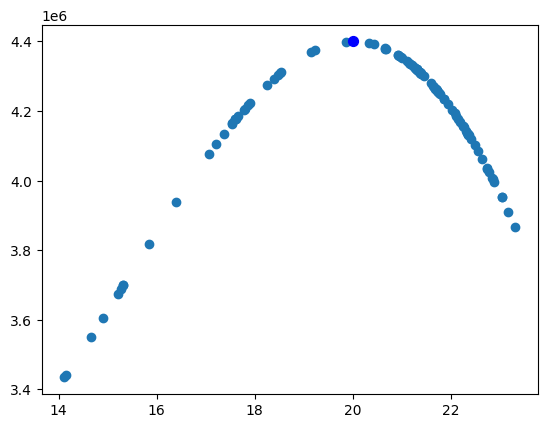

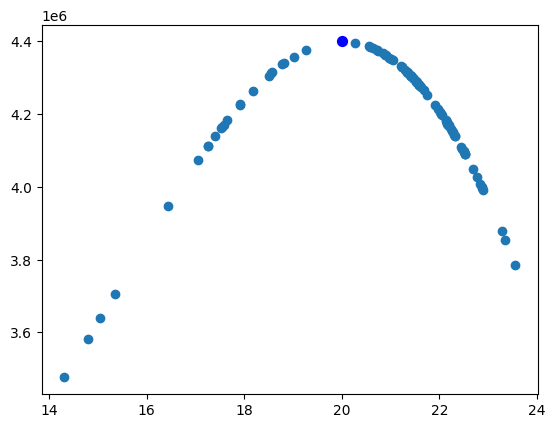

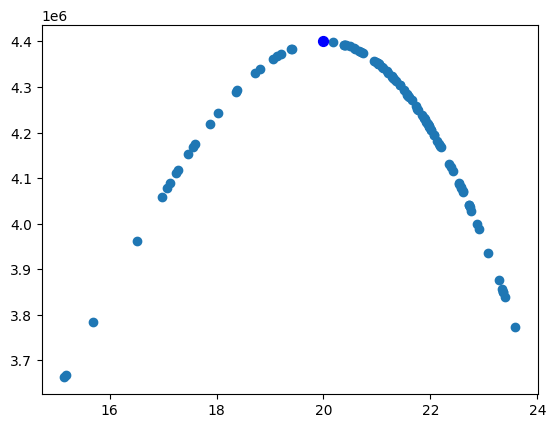

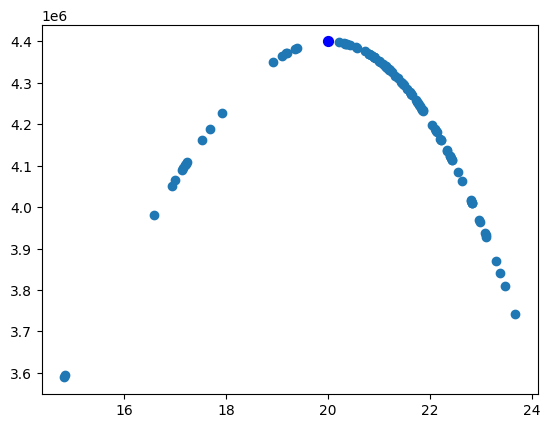

generation: 20 | best fitness: 4399999.9347 | curr fitness: 4399985.9528 | curr parent: 19.9823


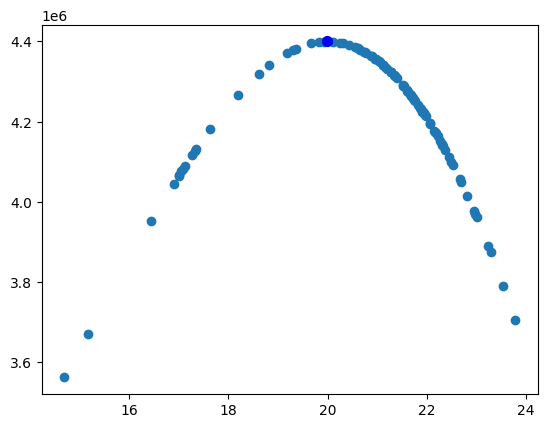

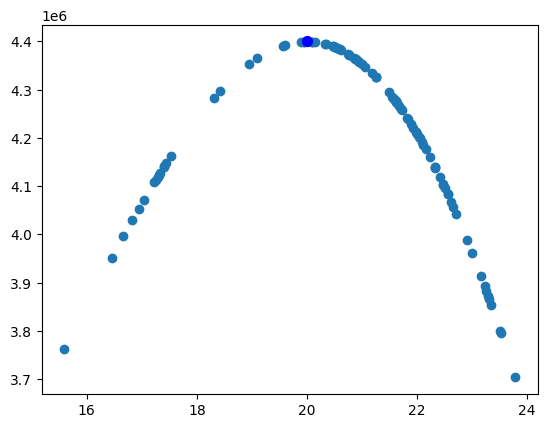

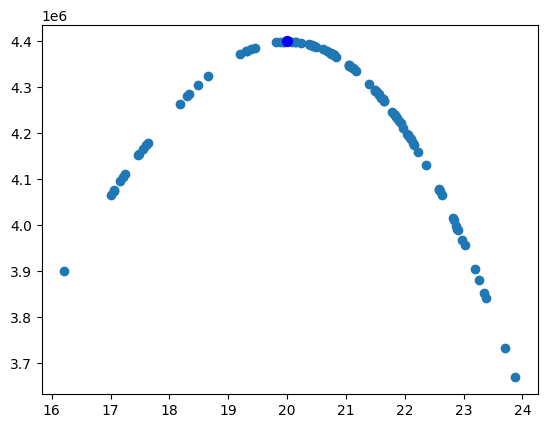

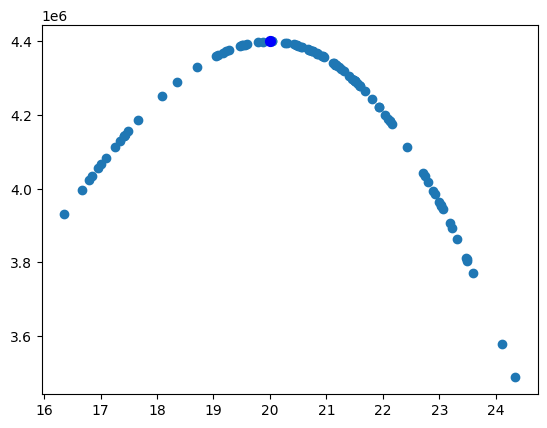

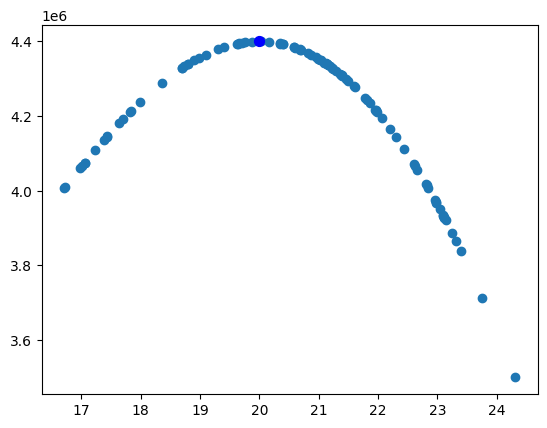

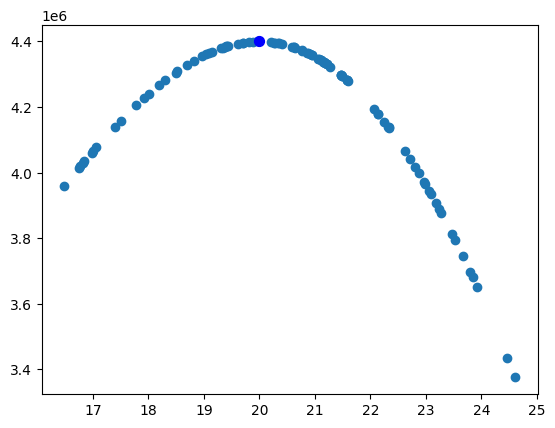

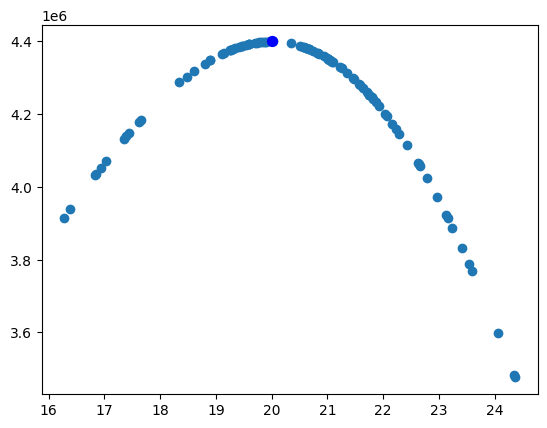

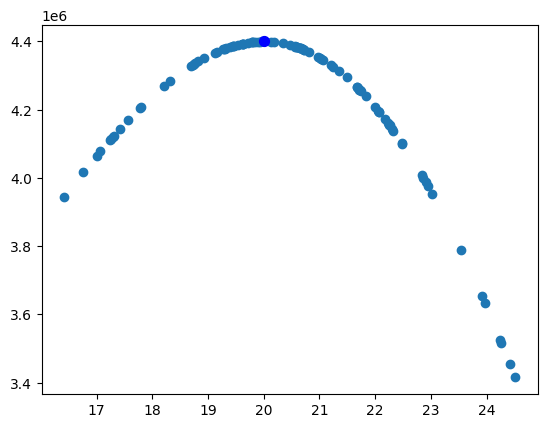

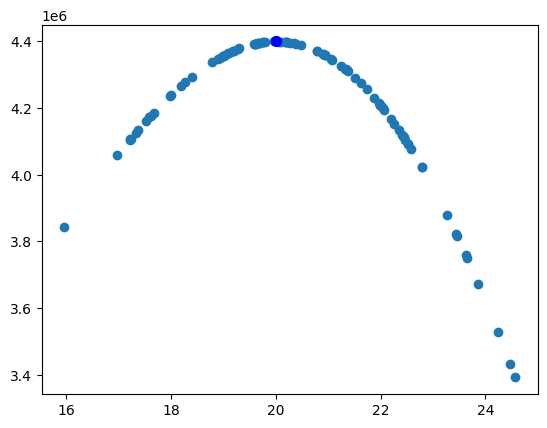

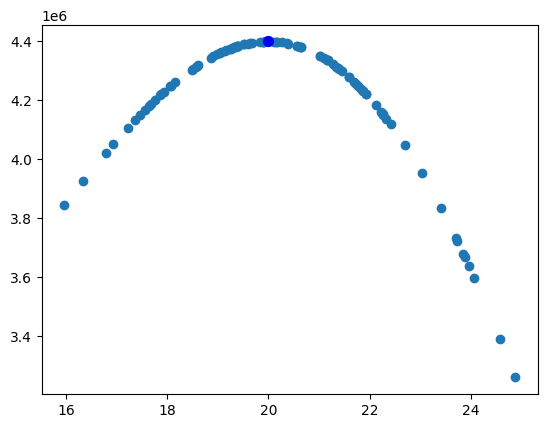

generation: 30 | best fitness: 4399999.9347 | curr fitness: 4399981.4198 | curr parent: 20.0203


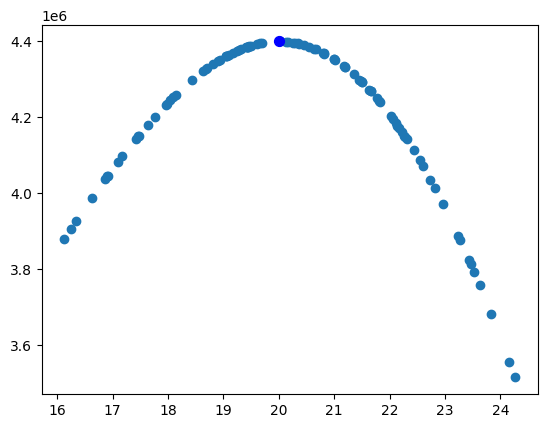

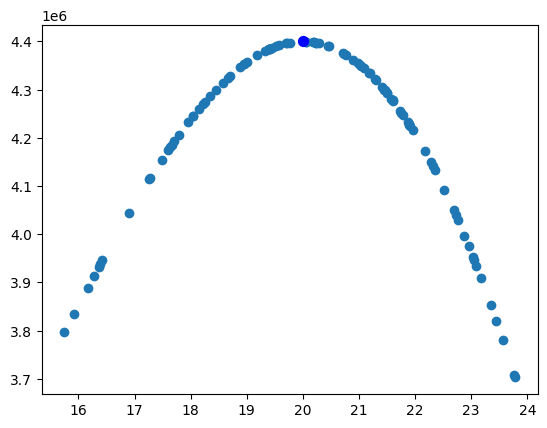

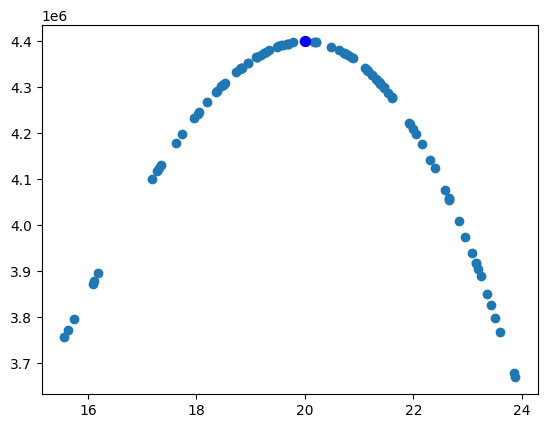

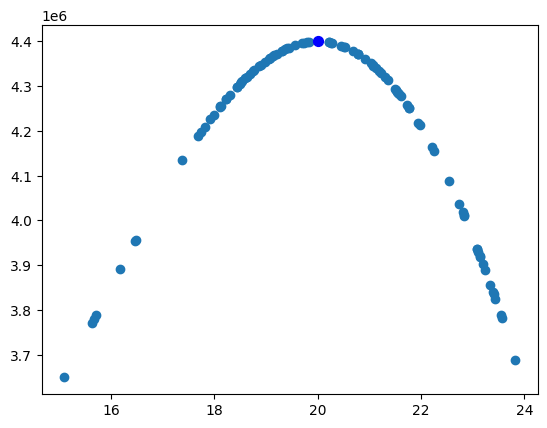

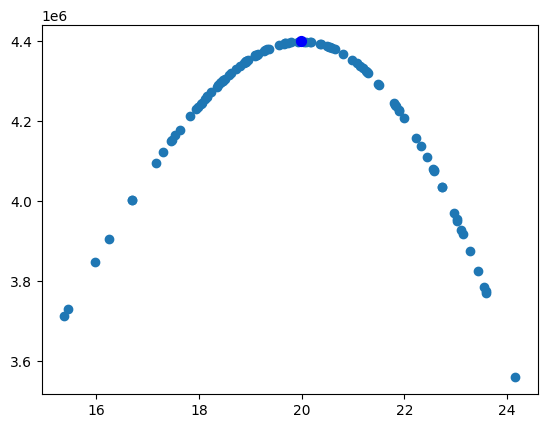

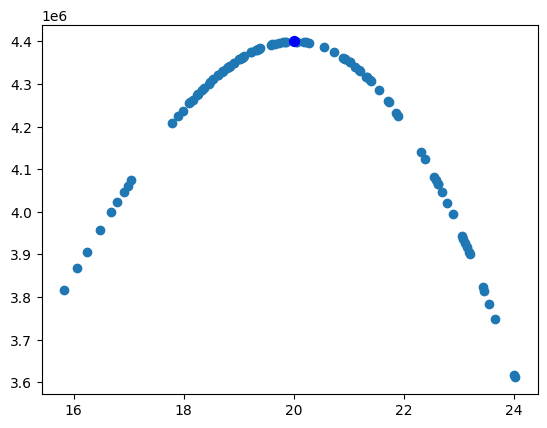

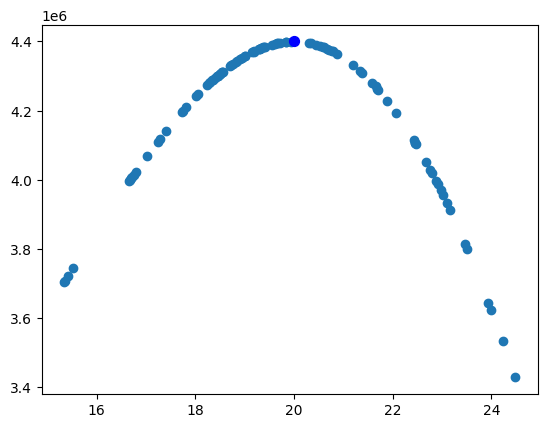

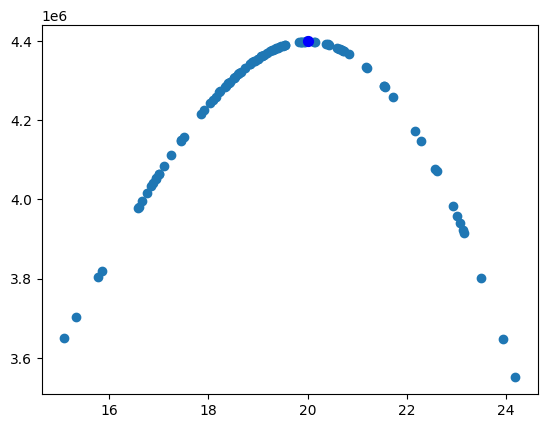

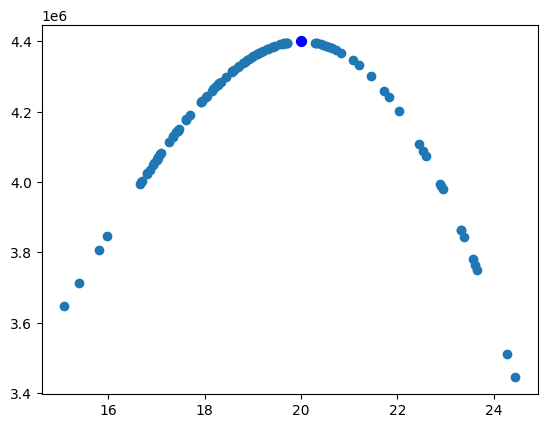

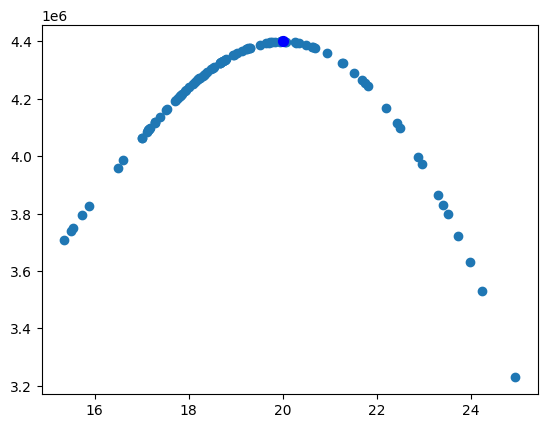

generation: 40 | best fitness: 4399999.9347 | curr fitness: 4399998.2597 | curr parent: 20.0062


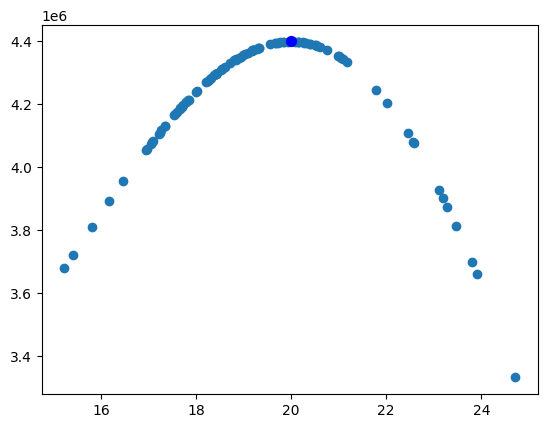

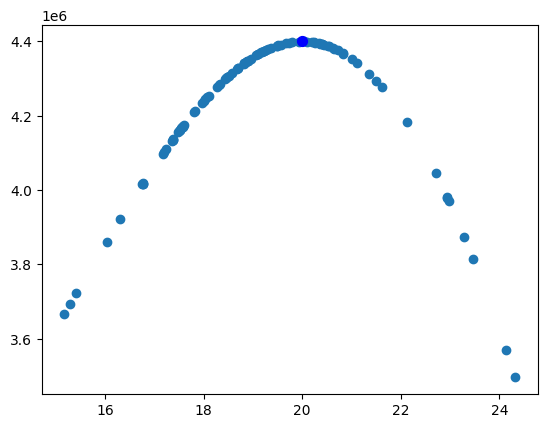

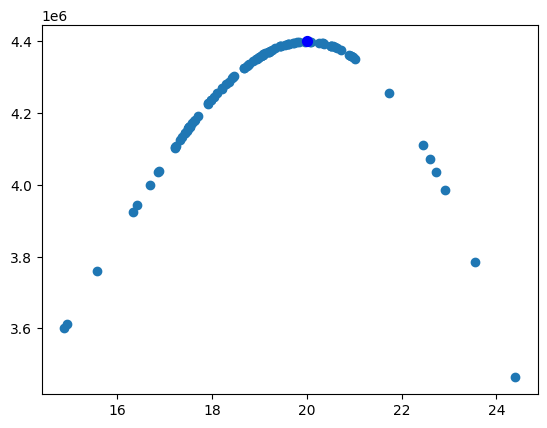

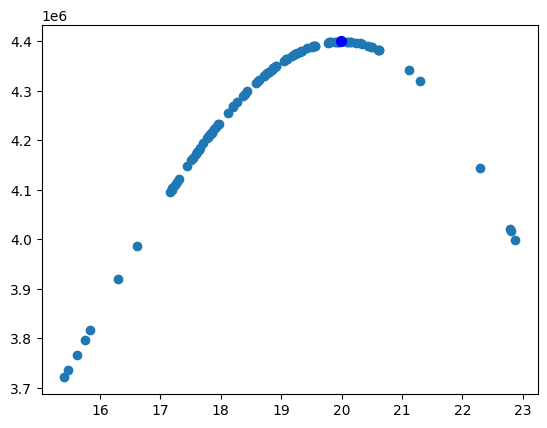

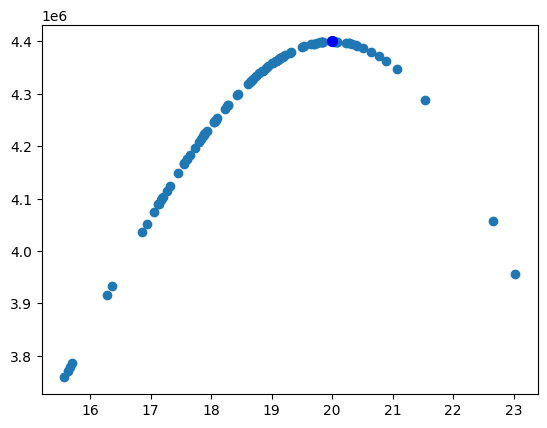

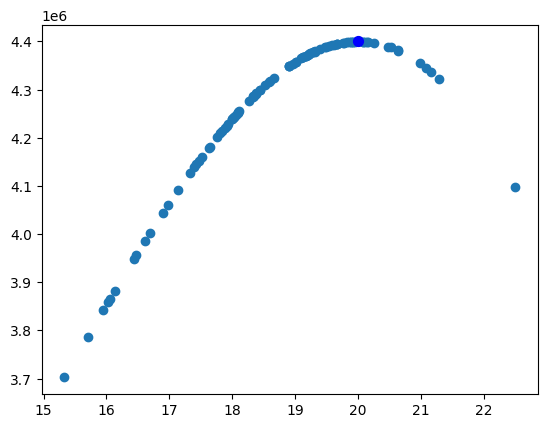

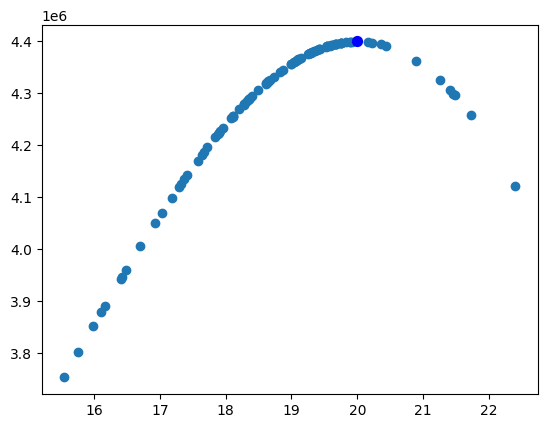

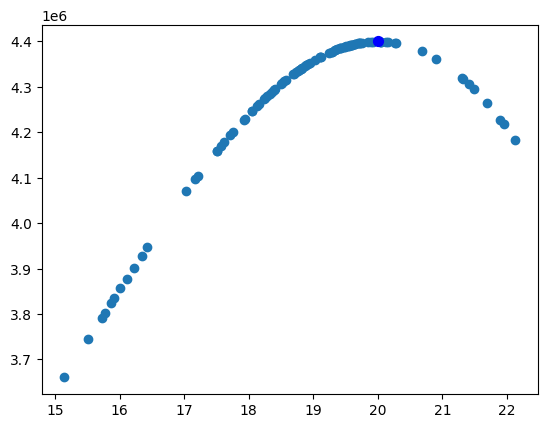

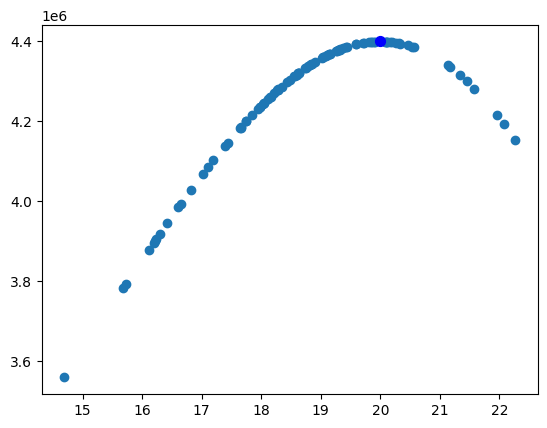

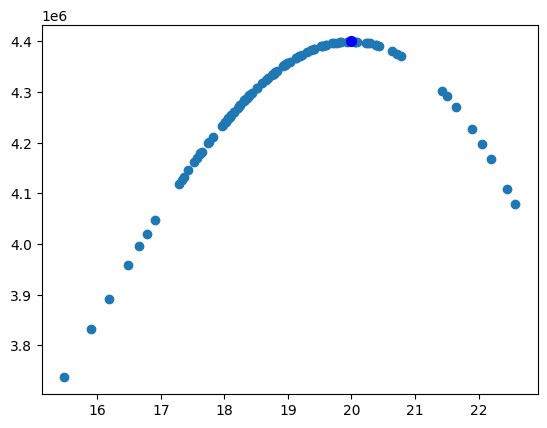

generation: 50 | best fitness: 4399999.9347 | curr fitness: 4399998.8791 | curr parent: 19.995


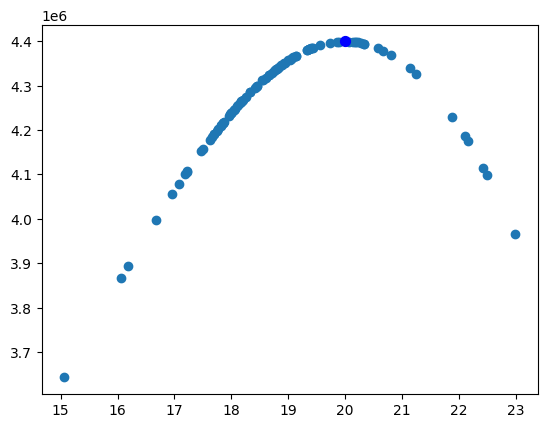

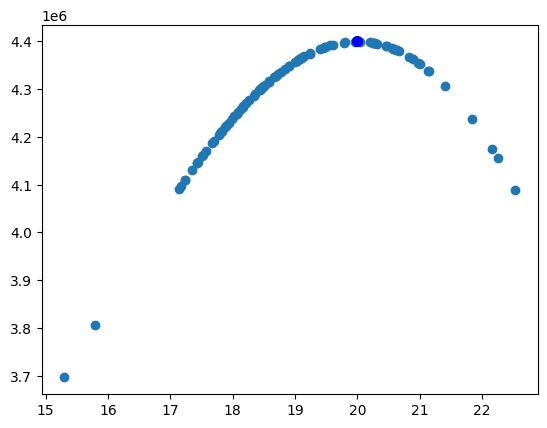

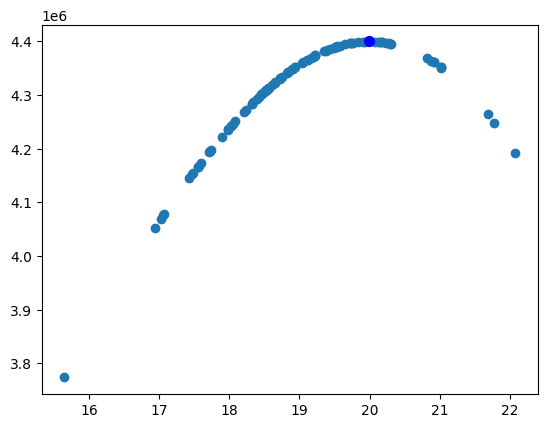

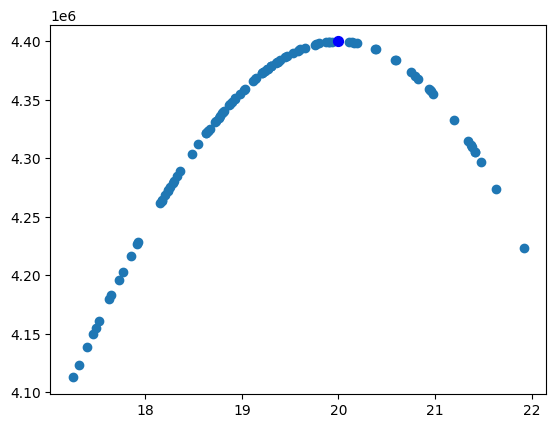

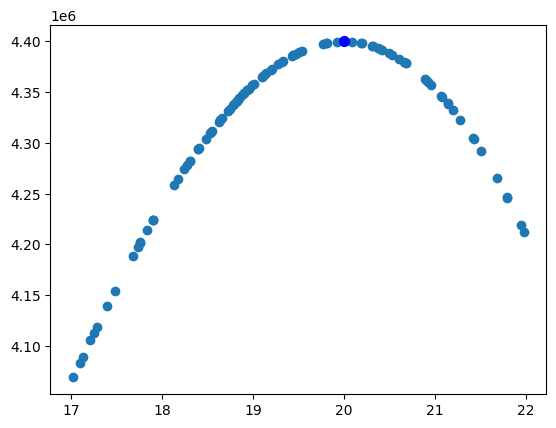

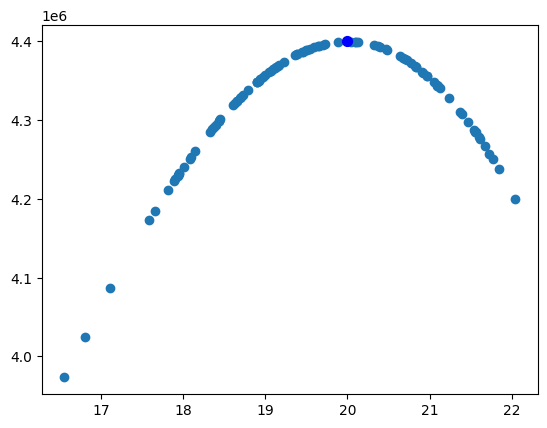

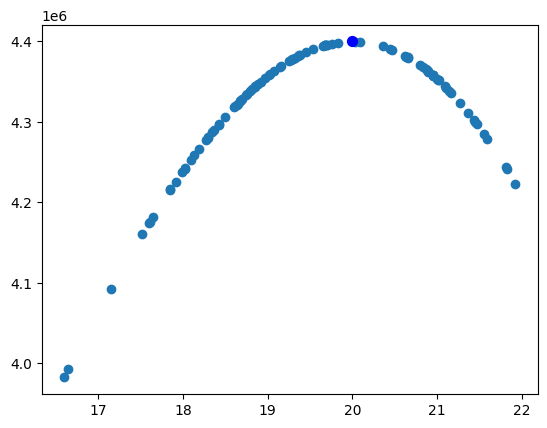

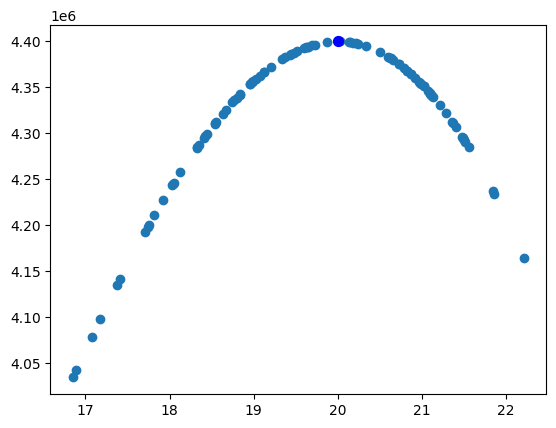

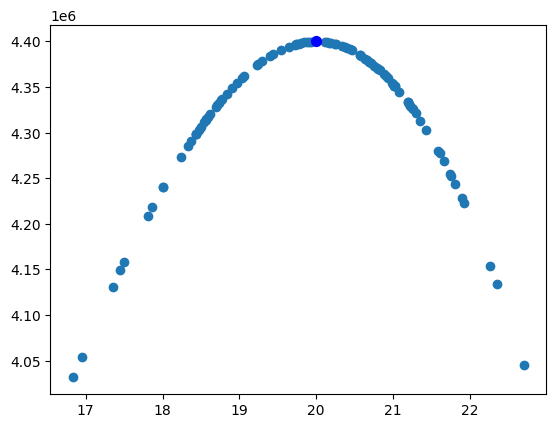

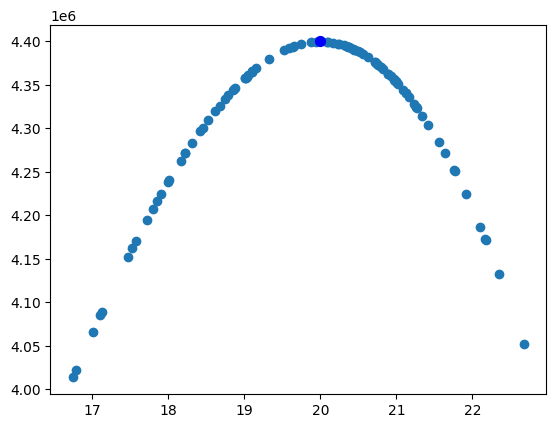

generation: 60 | best fitness: 4399999.9347 | curr fitness: 4399995.3062 | curr parent: 19.9898


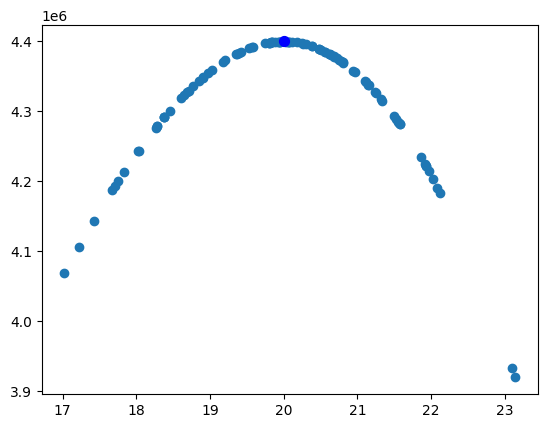

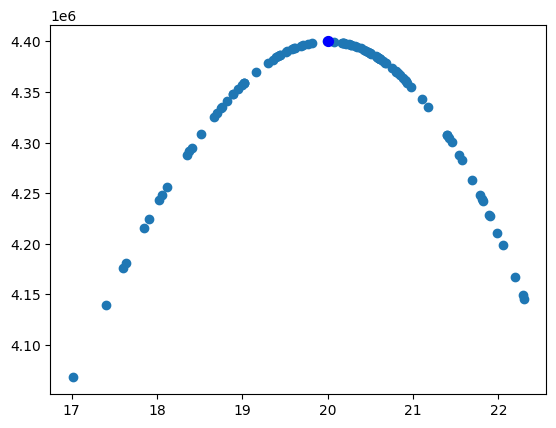

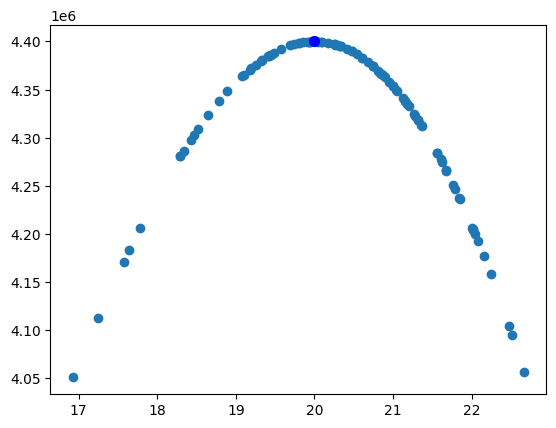

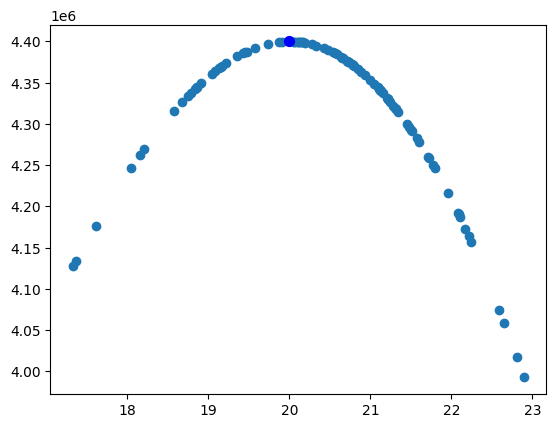

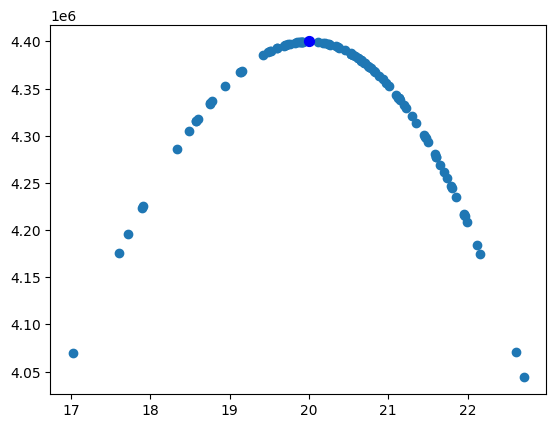

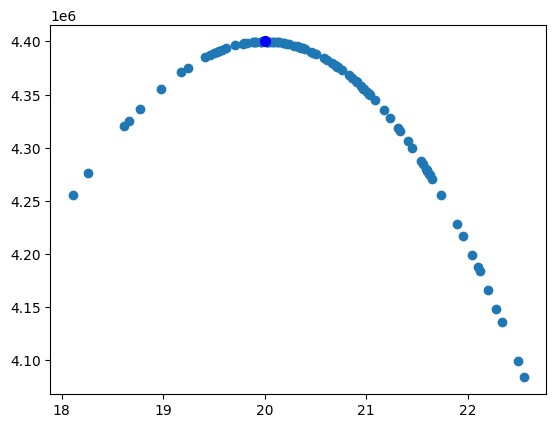

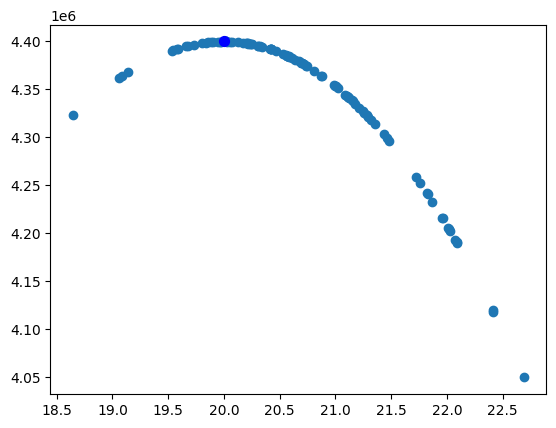

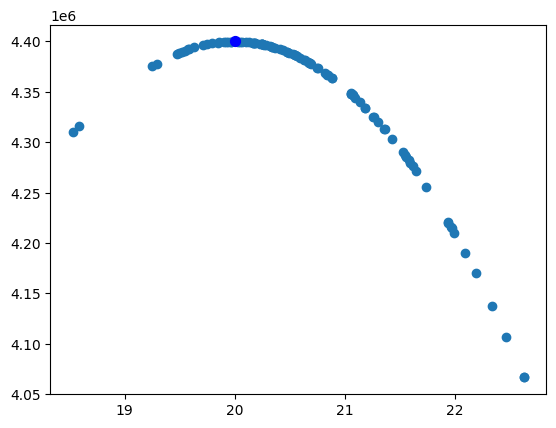

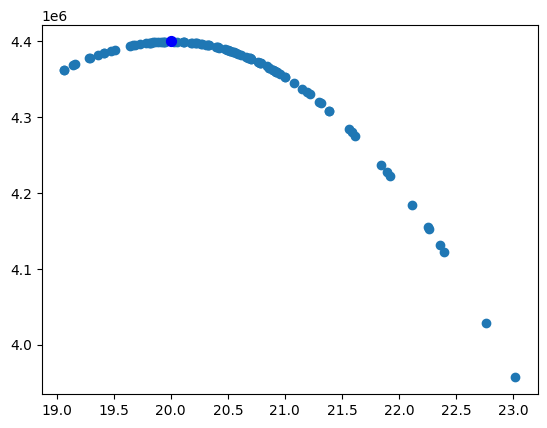

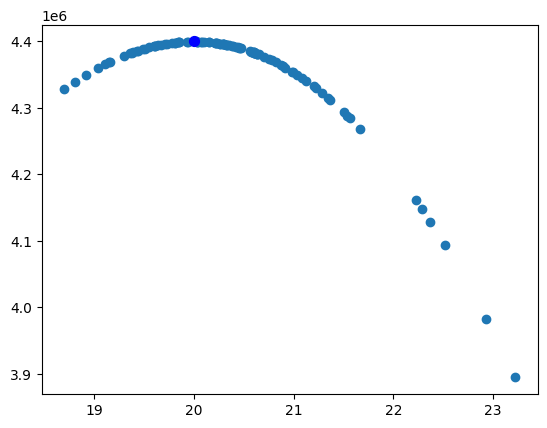

generation: 70 | best fitness: 4399999.9887 | curr fitness: 4399992.3444 | curr parent: 20.013


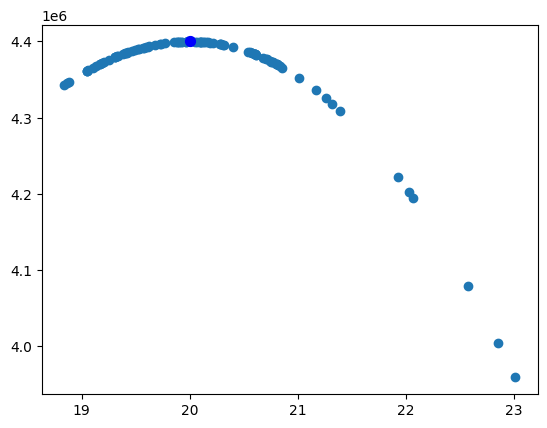

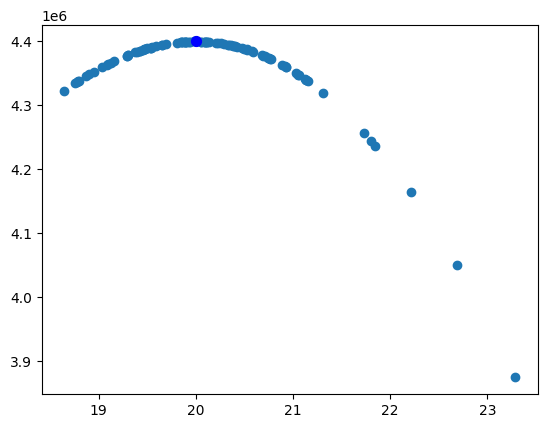

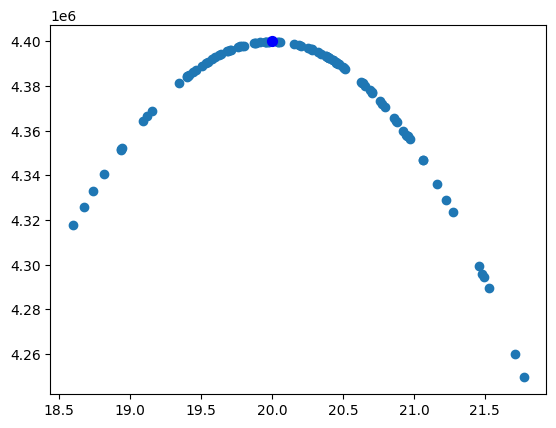

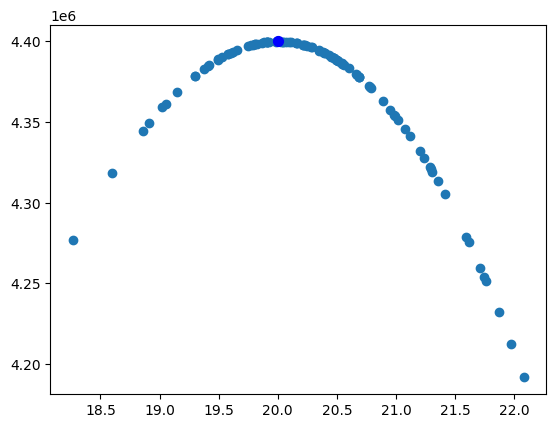

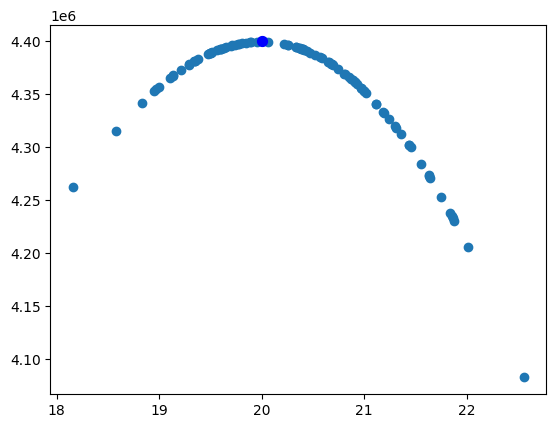

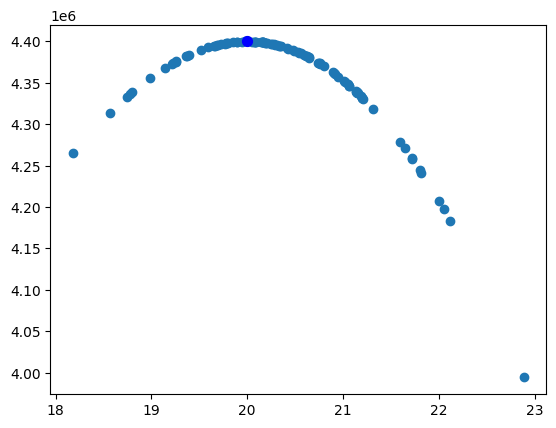

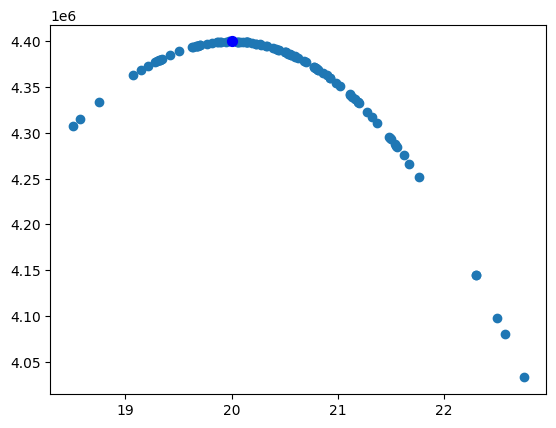

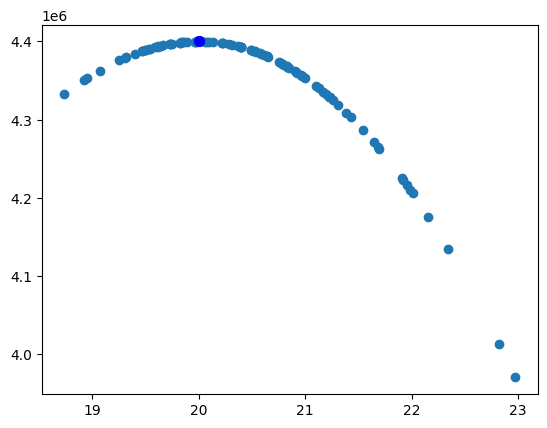

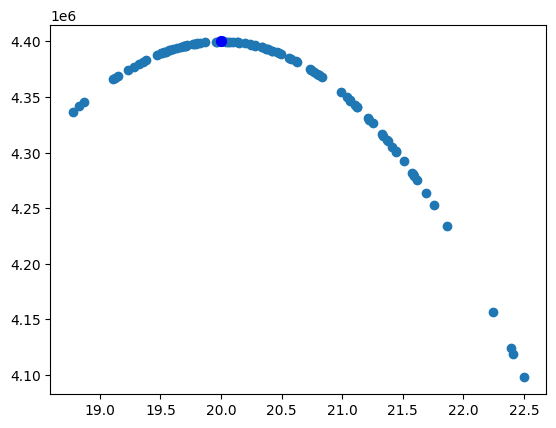

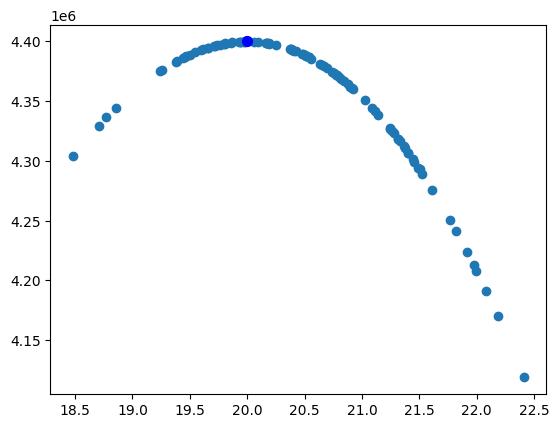

generation: 80 | best fitness: 4399999.9959 | curr fitness: 4399999.9959 | curr parent: 19.9997


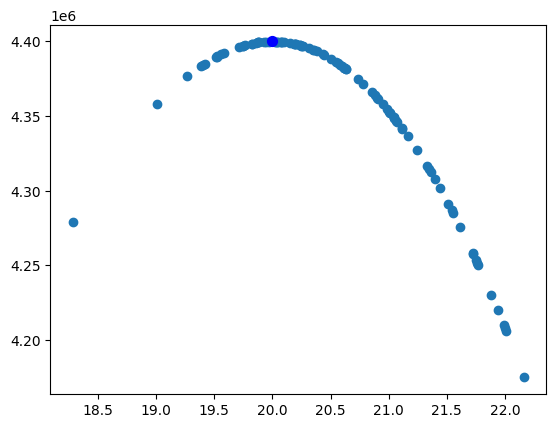

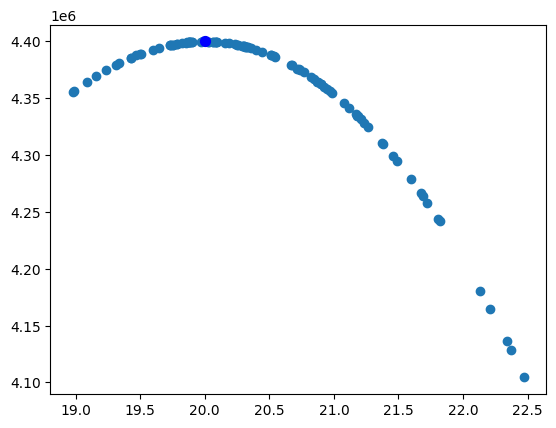

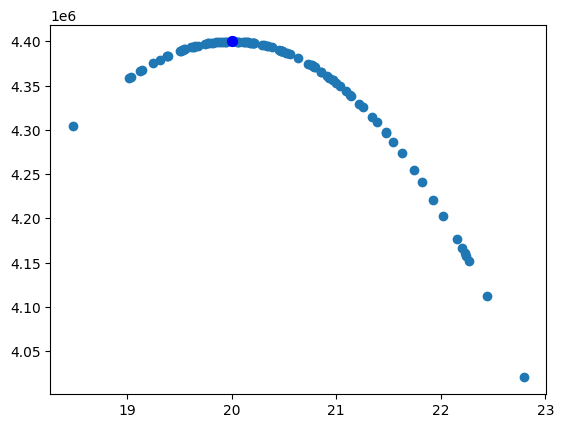

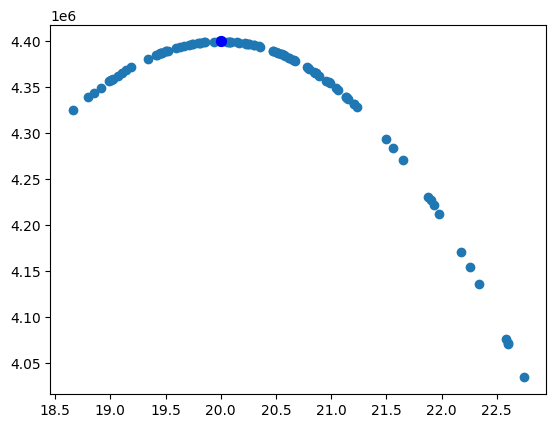

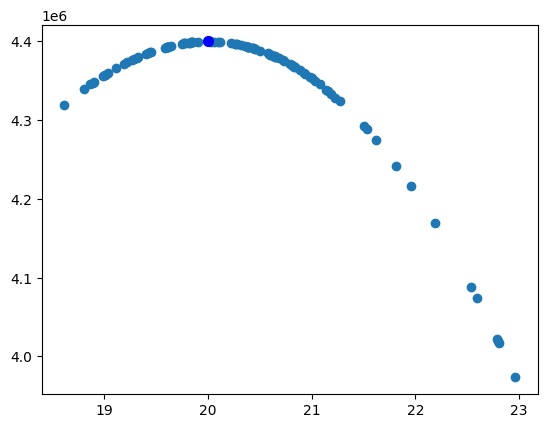

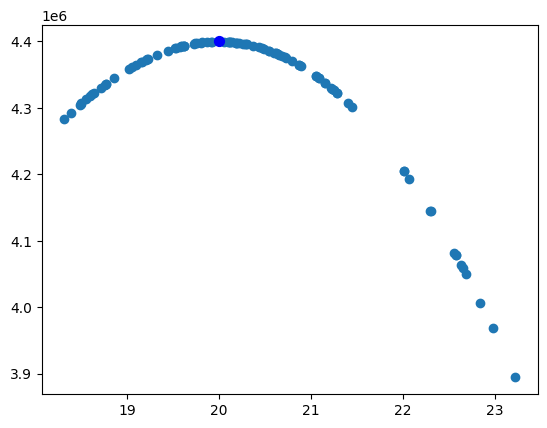

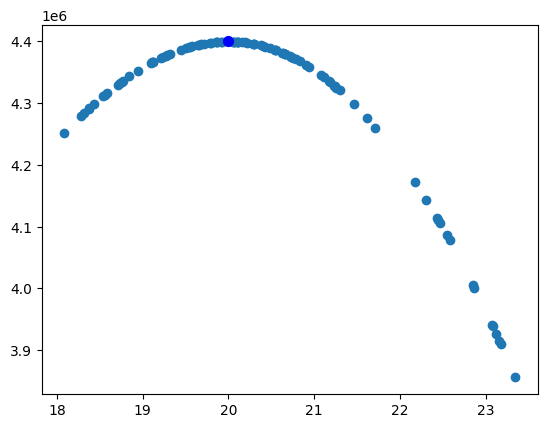

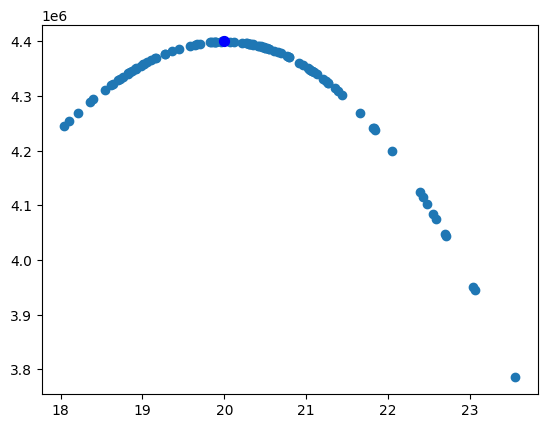

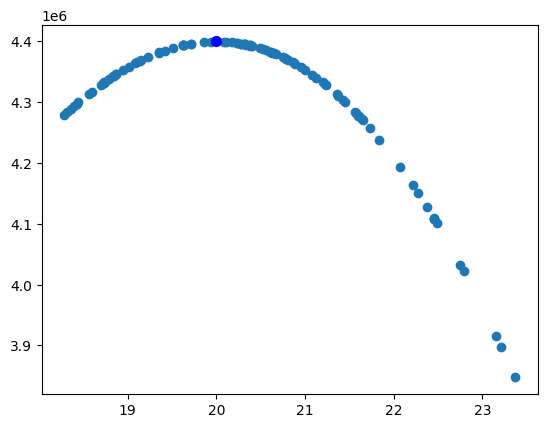

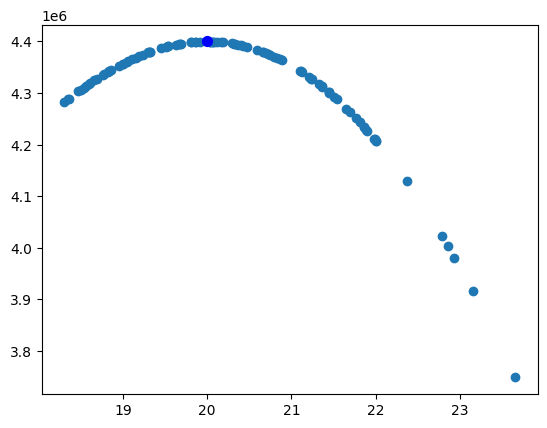

generation: 90 | best fitness: 4399999.9959 | curr fitness: 4399999.8603 | curr parent: 19.9982


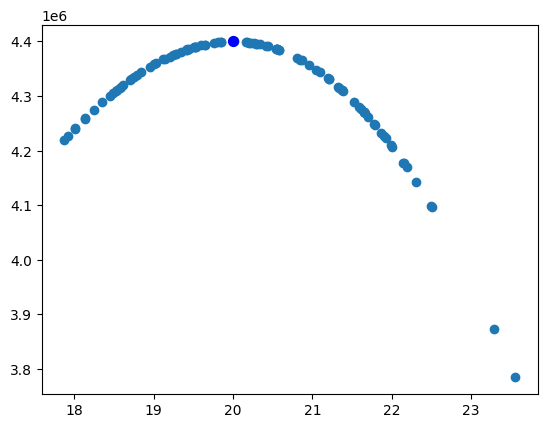

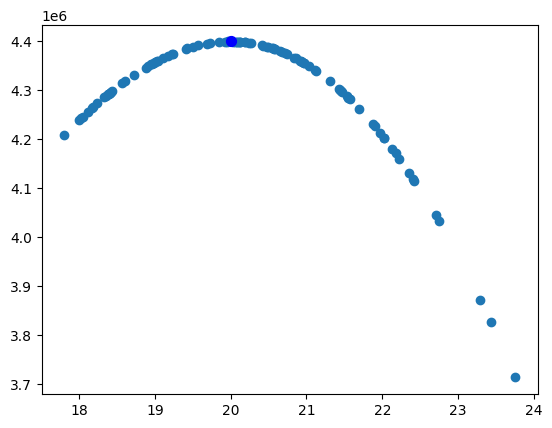

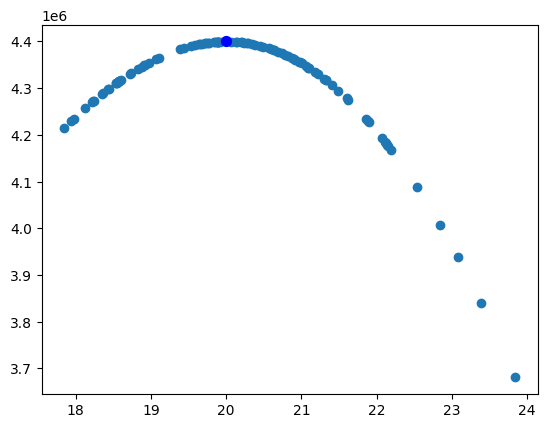

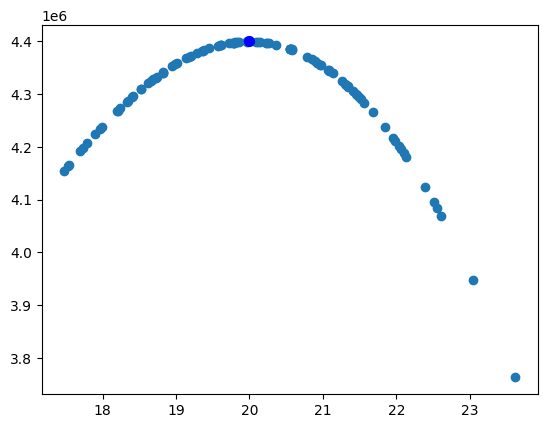

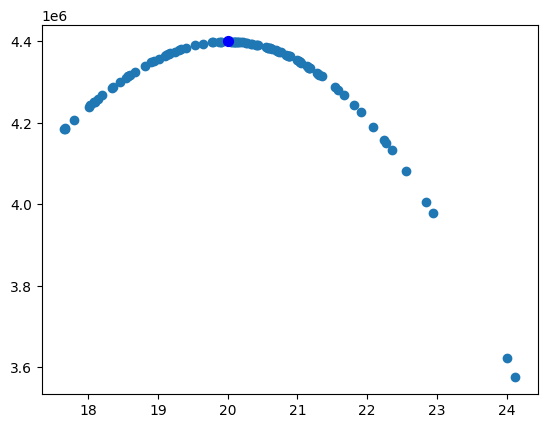

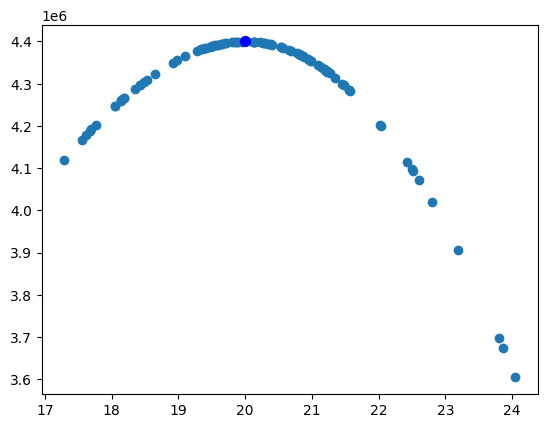

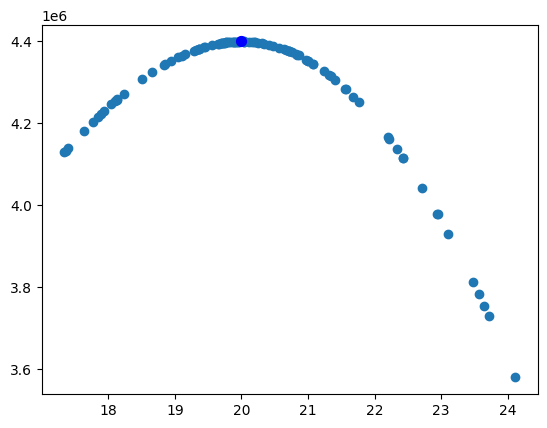

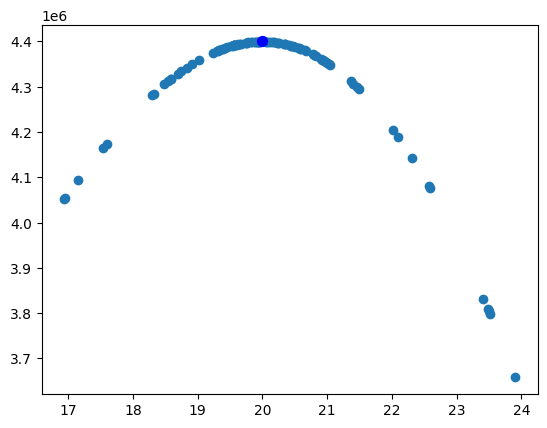

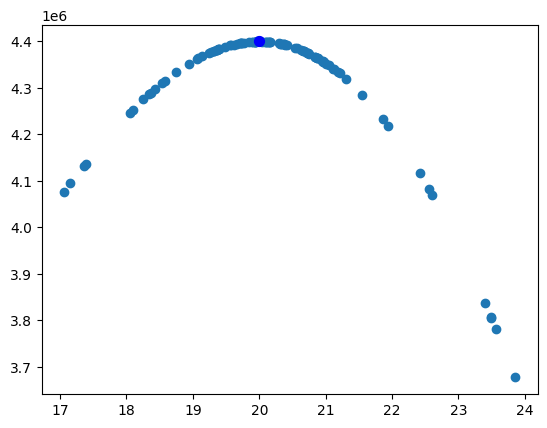

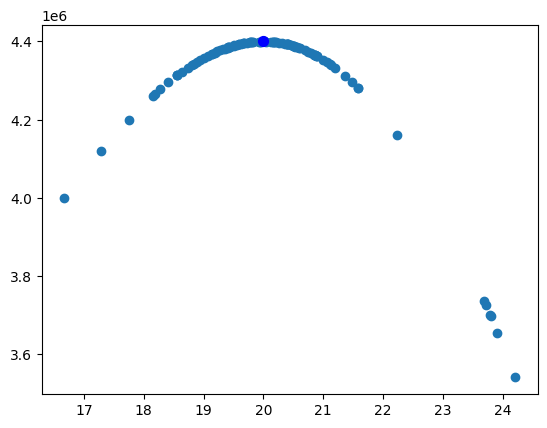

generation: 99 | best fitness: 4399999.9959 | best parent: 19.9997
top parent x = 19.9997, top fitness y = 4399999.9959


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def _fitness(x):
    if 0 < x < 32:
        y = 12 * x**5 - 975 * x**4 + 28000 * x**3 - 345000 * x**2 + 1800000 * x
        return round(y, 6)
    else:
        return 0

fitness = np.vectorize(_fitness)

def mutate(parents, fitness_function):
    n = len(parents)
    scores = fitness_function(parents)
    idx = scores > 0
    scores = scores[idx]
    parents = np.array(parents)[idx]

    children = np.random.choice(parents, size=n, p=scores / scores.sum())
    children = children + np.random.uniform(-0.51, 0.51, size=n)

    return children.tolist()

def GA(parents, fitness_function, popsize=100, max_iter=100):
    History = []

    def _get_fittest_parents(parents, fitness):
        _fitness = fitness(parents)
        PFitness = list(zip(parents, _fitness))
        PFitness.sort(key=lambda x: x[1], reverse=True)
        best_parent, best_fitness = PFitness[0]
        return round(best_parent, 4), round(best_fitness, 4)

    best_parent, best_fitness = _get_fittest_parents(parents, fitness)

    # Plot the initial state
    x = np.linspace(0, 32, 200)
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker='X')

    for i in range(max_iter):
        parents = mutate(parents, fitness_function=fitness_function)

        curr_parent, curr_fitness = _get_fittest_parents(parents, fitness_function)

        if curr_fitness > best_fitness:
            best_fitness = curr_fitness
            best_parent = curr_parent

        if i % 10 == 0:
            print('generation: {} | best fitness: {} | curr fitness: {} | curr parent: {}'.format(i, best_fitness,
                                                                                                   curr_fitness,
                                                                                                   curr_parent))

        History.append((i, np.max(fitness_function(parents))))

        plt.scatter(parents, fitness_function(parents))
        plt.scatter(best_parent, fitness_function(best_parent), marker='.', c='b', s=200)
        plt.pause(0.09)

    plt.ioff()
    print('generation: {} | best fitness: {} | best parent: {}'.format(i, best_fitness, best_parent))

    return best_parent, best_fitness, History

x = np.linspace(0, 32, 200)
init_pop = np.random.uniform(low=0, high=32, size=100)

parent_, fitness_, history_ = GA(init_pop, fitness)

print('top parent x = {}, top fitness y = {}'.format(parent_, fitness_))
